In [33]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [34]:
from dLux.base import OpticalSystem, Scene
from dLux import layers as l
from dLux import propagators as p

In [35]:
import jax.numpy as np
import matplotlib.pyplot as plt

In [36]:
layers = [
    l.CreateWavefront(256, 1.),
    l.NormaliseWavefront(256),
    p.MFT(256, 256, 1, 10, 1e-6),
    l.Wavefront2PSF(256)
]

wavels = np.array([5e-7])
positions = np.array([0, 0])
fluxes = np.array([1e6])

In [37]:
osys = OpticalSystem(layers)
scene = Scene(osys, wavels, positions, fluxes)
psf = scene()[0]

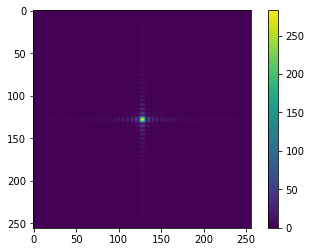

In [38]:
plt.imshow(psf**0.5)
plt.colorbar()
plt.show()